## Installation

```mamba install -c conda-forge molfeat datamol```

or

```conda install -c conda-forge molfeat datamol```

# DataMol framework

In [1]:
import datamol as dm

In [2]:
df = dm.read_csv('train.csv', smiles_column='smi')

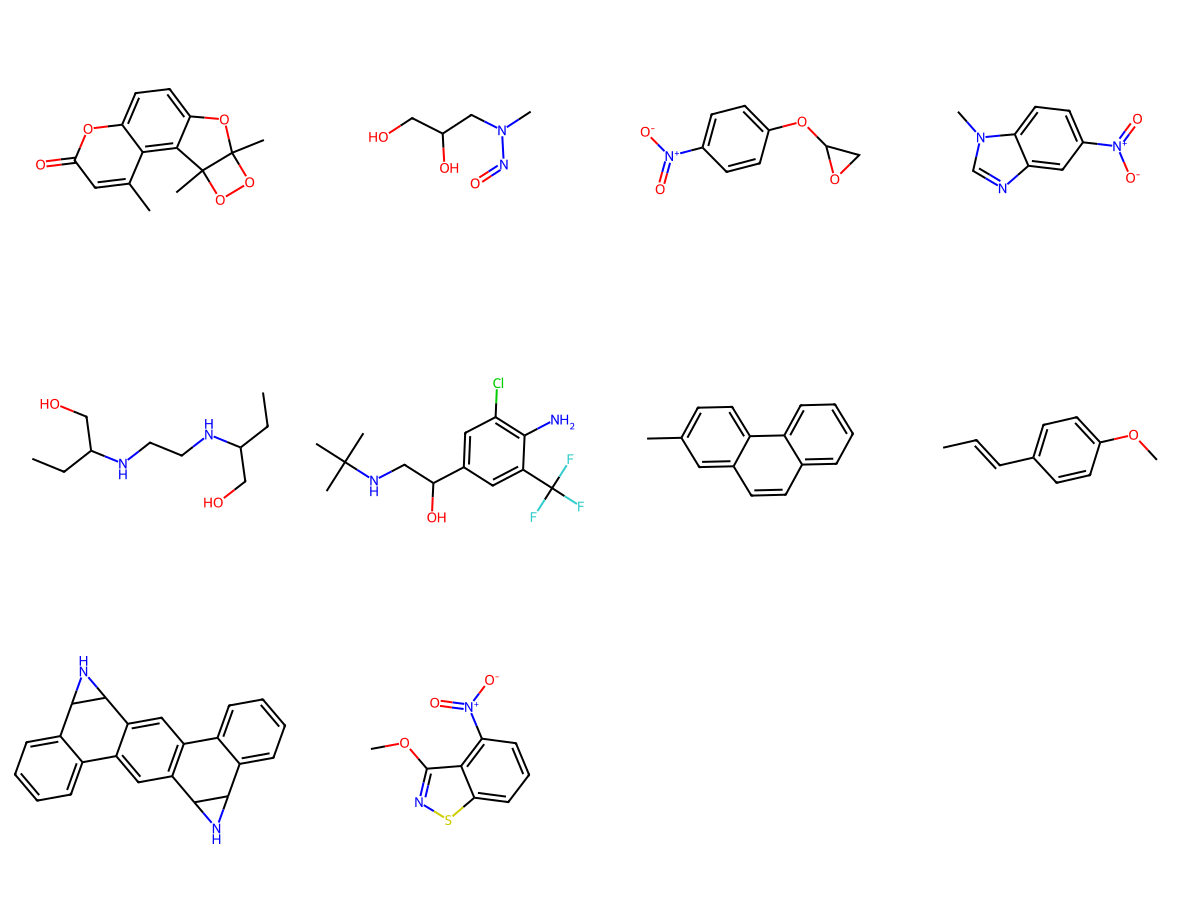

In [3]:
dm.viz.to_image(df.mol)

# Molfeat

In [4]:
from molfeat.trans import FPVecTransformer

In [8]:
# fpvec transformers
tr = FPVecTransformer('mordred', length=32, n_jobs=1)
res = tr(df.smi)
print(res.shape)
print(res)

(10, 1613)
[[ 15.774861   13.370546    0.        ... 152.          6.5416665
    3.7986112]
 [  5.8756337   6.339087    0.        ...  34.          4.9722223
    2.3333333]
 [ 10.077834    8.656208    0.        ...  75.          4.1944447
    2.8611112]
 ...
 [  7.7781744   7.210288    0.        ...  52.          3.9722223
    2.75     ]
 [ 20.727922   16.082634    0.        ... 204.          4.3333335
    4.8333335]
 [ 10.663621   10.08338     0.        ...  86.          5.0555553
    3.1944444]]


In [76]:
# featconcat

from molfeat.trans import FeatConcat

trans = FeatConcat([
    FPVecTransformer('ecfp:4'),
    FPVecTransformer('mordred', n_jobs=-1),
    FPVecTransformer('erg'),
])

trans(df.mol).shape


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

(10, 3928)

In [77]:
# single calculators
from molfeat.calc import MordredDescriptors, RDKitDescriptors2D

mord = MordredDescriptors()

mord(df.mol[0])

array([ 15.77486167,  13.37054663,   0.        , ..., 152.        ,
         6.54166667,   3.79861111])

In [78]:
calc = RDKitDescriptors2D()

with dm.without_rdkit_log():
    print(calc(df.mol[0]))

[ 1.14532873e+01  1.14532873e+01  3.58742678e-01 -8.27189744e-01
  5.37391009e-01  3.15263158e+01  2.60245000e+02  2.48149000e+02
  2.60068473e+02  9.80000000e+01  0.00000000e+00  3.35960371e-01
 -4.55854509e-01  4.55854509e-01  3.35960371e-01  1.15789474e+00
  1.94736842e+00  2.63157895e+00  1.72887259e+01  9.85235653e+00
  2.67418894e+00 -2.45567071e+00  2.58656325e+00 -2.60427000e+00
  5.87658331e+00 -5.86688238e-01  2.49326668e+00  2.15537520e+00
  7.77235365e+02  1.34138491e+01  1.07732923e+01  1.07732923e+01
  8.94510721e+00  6.08356956e+00  6.08356956e+00  5.30796561e+00
  5.30796561e+00  4.08384002e+00  4.08384002e+00  2.86341490e+00
  2.86341490e+00 -1.85000000e+00  2.49326668e+00  1.10168916e+01
  3.00017877e+00  1.10277899e+00  1.08162386e+02  9.15401389e+00
  1.13325320e+01  5.60105081e+00  0.00000000e+00  5.78711115e+00
  5.62558632e+00  0.00000000e+00  9.68210814e+00  4.88757095e+00
  0.00000000e+00  0.00000000e+00  3.15436600e+01  2.39397800e+01
  0.00000000e+00  1.89291

In [11]:
ADD_3D_FEATS = True

feats2D_params = [
    # fps
    {'kind': 'ecfp:4', 'length': 1024},    
    {'kind': 'topological', 'length': 1024, 'n_jobs': -1},
    {'kind': 'avalon', 'length': 1024, 'n_jobs': -1},
    {'kind': 'layered', 'length': 1024, 'n_jobs': -1},
    {'kind': 'secfp', 'length': 1024, 'n_jobs': -1},
    {'kind': 'pattern', 'length': 1024, 'n_jobs': -1},
    {'kind': 'pharm2D', 'length': 1024, 'n_jobs': -1},
    
    # fixed length fps
    {'kind': 'erg', 'n_jobs': -1},
    {'kind': 'maccs', 'n_jobs': -1},
    
    # fixed length descriptors - to normalize
    {'kind': 'estate', 'n_jobs': -1},
    {'kind': 'desc2D', 'n_jobs': -1},
    {'kind': 'mordred', 'n_jobs': -1},
    {'kind': 'cats2D', 'n_jobs': -1},
    {'kind': 'scaffoldkeys', 'n_jobs': -1},
    {'kind': 'skeys', 'n_jobs': -1},
]

feats3D_params = [
    {'kind': 'pharm3D', 'length': 1024, 'n_jobs': -1},
    {'kind': 'desc3D', 'n_jobs': -1},
    {'kind': 'cats3D', 'n_jobs': -1},
    {'kind': 'electroshape', 'n_jobs': -1},
    {'kind': 'usr'},
    {'kind': 'usrcat'},
]

In [ ]:
for params in feats2D_params:
    tr = FPVecTransformer(**params)
    

In [81]:
mols3d = df.mol.apply(dm.conformers.generate, n_confs=1, ignore_failure=True)


In [82]:
mols3d

id
0                                                None
1    <rdkit.Chem.rdchem.Mol object at 0x7f9b03d85b60>
2    <rdkit.Chem.rdchem.Mol object at 0x7f9b03d85bd0>
3    <rdkit.Chem.rdchem.Mol object at 0x7f9b03d85c40>
4    <rdkit.Chem.rdchem.Mol object at 0x7f9b03d85cb0>
5    <rdkit.Chem.rdchem.Mol object at 0x7f9b03d85d20>
6    <rdkit.Chem.rdchem.Mol object at 0x7f9b03d85e00>
7    <rdkit.Chem.rdchem.Mol object at 0x7f9b03d85d90>
8    <rdkit.Chem.rdchem.Mol object at 0x7f9b03d85e70>
9    <rdkit.Chem.rdchem.Mol object at 0x7f9b03d85f50>
Name: mol, dtype: object

# HuggingFace Models

In [36]:
from molfeat.store.modelstore import ModelStore
store = ModelStore()

In [37]:
# list of huggingface models in store
hf_models = [x.name for x in store.available_models if x.group == 'huggingface']
print(hf_models)

['ChemBERTa-77M-MLM', 'ChemBERTa-77M-MTR', 'ChemGPT-1.2B', 'ChemGPT-19M', 'ChemGPT-4.7M', 'GPT2-Zinc480M-87M', 'MolT5', 'Roberta-Zinc480M-102M']


In [38]:
[x.description for x in store.available_models if x.name == 'ChemBERTa-77M-MTR']

['ChemBERTa is a pre-trained language model for molecules based on (Ro)BERT(a) trained on PubChem compounds. The MTR version was pretrained using mutitask regression objective, while the MLM version was pretrained using a masked language modeling objective']

In [83]:
from molfeat.trans.pretrained.hf_transformers import PretrainedHFTransformer

trans = PretrainedHFTransformer('ChemBERTa-77M-MTR')

res = trans(df.mol)

print(res)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


[[ 0.05715178  0.19459291 -0.03500636 ... -0.33157563 -0.63284564
  -0.7430768 ]
 [-0.17824948  1.0112467  -0.2039687  ... -0.08684027 -0.22337312
  -0.4990303 ]
 [-0.15956064  0.02837523 -0.0398798  ...  0.02919286 -0.948822
  -0.94402754]
 ...
 [ 0.08753072  0.07458484 -0.01893615 ... -0.03555338 -0.5651862
  -0.70098555]
 [ 0.01420718  0.07726502 -0.00392499 ... -0.11688431  0.07352167
  -0.48962328]
 [-0.05352121  0.2050651  -0.05079111 ...  0.01412854 -0.6985798
  -0.7950081 ]]


In [55]:
for name in hf_models:
    print(name)
    try:
        trans = PretrainedHFTransformer(name, preload=True)
        print(name, trans(['C1NCC1']).shape)
    except Exception as e:
        print(e)

ChemBERTa-77M-MLM


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


ChemBERTa-77M-MLM (1, 384)
ChemBERTa-77M-MTR


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


ChemBERTa-77M-MTR (1, 384)
ChemGPT-1.2B
Can't retrieve model ChemGPT-1.2B from the store !
ChemGPT-19M
ChemGPT-19M (1, 256)
ChemGPT-4.7M
ChemGPT-4.7M (1, 128)
GPT2-Zinc480M-87M
GPT2-Zinc480M-87M (1, 768)
MolT5
MolT5 (1, 1024)
Roberta-Zinc480M-102M
Roberta-Zinc480M-102M (1, 768)
